# 다중 회귀(multiple Regression)

여러 개의 특성을 이용하는 회귀 모델

* `feature engineering`: 기존 feature을 이용해 새로운 feature을 만드는 것.

In [3]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy() # 넘파이 배열로 변환
perch_full[:5]

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94]])

In [4]:
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [5]:
print(perch_weight.shape, perch_full.shape)

(56,) (56, 3)


In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full,
                                                                     perch_weight,
                                                                     random_state = 42)

* `transform()`: 사이킷런에서 제공하는 변환기


2개의 원소의 특징을 가지고 있는 샘플 [2,3]이 6개의 특성을 가진 [1. 2. 3. 4. 6. 9.]샘플이 되었다.

각 특성의 제곱항과 서로를 곱한 항을 추가한 것. 이때 1이 추가되는데 이는 선형 방정식의 절편에 곱해지는 값으로 선형모델에서는 자동으로 절편을 추가하므로 `include_bias = False`로 지정하여 trasform에서 빼줄 수 있다

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
poly = PolynomialFeatures()

poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [9]:
poly = PolynomialFeatures(include_bias = False)

poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [10]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [11]:
poly.get_feature_names_out() # 각 특성이 어떤 입력 조합으로 만들어줬는지 알려줌

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [12]:
test_poly = poly.transform(test_input)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()

lr.fit(train_poly, train_target)
print("훈련 데이터에 대한 예측 정확도: ",lr.score(train_poly, train_target))
print("테스트 데이터에 대한 예측 정확도: ",lr.score(test_poly, test_target))

훈련 데이터에 대한 예측 정확도:  0.9903183436982126
테스트 데이터에 대한 예측 정확도:  0.9714559911594143


특성을 추가하여(두께) 사용하고 특성 공학(feature engineering)을 통해 특성을 추가하였더니 `선형 회귀 능력이 매우 강해지는 것`을 확인할 수 있다. 


* 이때 3제곱항, 4제곱항을 한 특성을 더 추가하면?

다음 degree =5 로 설정하여 5제곱항까지 특성에 추가되도록 해보자.


In [15]:
poly = PolynomialFeatures(degree =5, include_bias = False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

train_poly.shape # 특성의 개수가 55개

(42, 55)

In [16]:
lr.fit(train_poly,train_target)
lr.score(train_poly, train_target)


0.999999999998714

In [17]:
lr.score(test_poly,test_target)

-144.4066764700865

훈련 데이터에 관해서는 선형 모델이 매우 강력해지지만 과대적합 문제가 발생할 수 있다.

# 규제

모델이 훈련 데이터를 너무 과도하게 학습하지 못하도록 규제하는 것을 말한다.선형 회귀 모델의 경우 특성에 곱해지는 계수(기울기) 크기를 작게하는 것을 말한다.

* 규제 적용 전, 특성 간 스케일의 차이로 계수가 차이가 나지 않도록 정규화 하는 과정 필요 

* `정규화`: 평균은 0 분산은 1이 되도록 특성을 만들어 주는 것

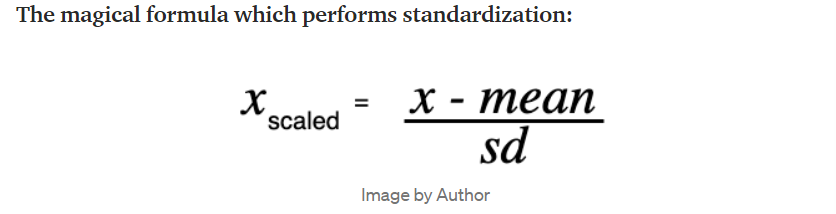

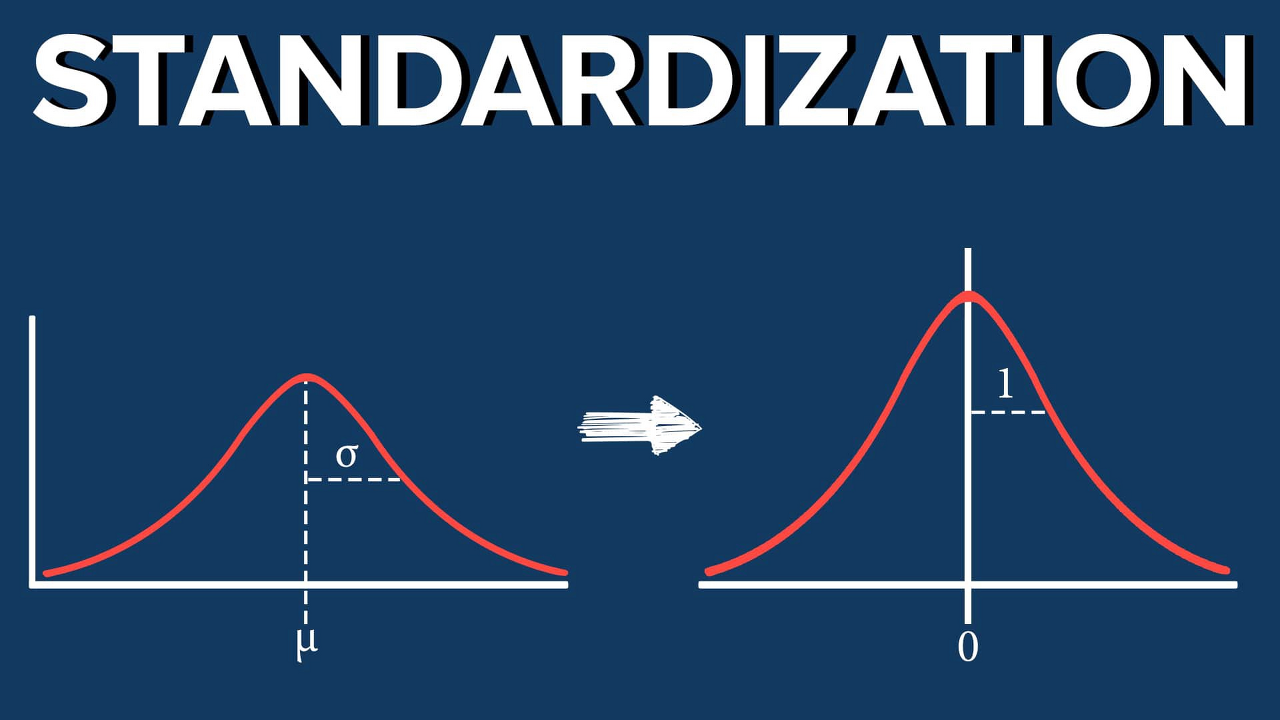



In [1]:
from sklearn.preprocessing import StandardScaler

In [20]:
ss = StandardScaler()

ss.fit(train_poly)

StandardScaler()

In [21]:
trained_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [29]:
print(ss.mean_.shape)
ss.scale_.shape

(55,)


(55,)

# 릿지와 라쏘

규제를 추가한 선형 모델 
* `릿지`: 계수에 제곱값을 기준으로 규제 적용
* `라쏘`: 계수의 절댓값을 기준으로 규제 적용

공통적으로 계수의 크기를 줄이지만 라쏘는 아예 0이 가능함

## 릿지 회귀

선형 회귀에서 L2규제를 추가한 회귀모델로 L2규제란 상대적으로 큰 회귀계수값의 예측 영향도를 감소시키기 위해 계수값을 작게 만드는 규제 모델

* `alpha` 를 통해 `규제 강도 조절`. alpha값이 크면 규제가 강해 계수값을 더 죽이고 과소적합을 유도함. alpha값이 작을수록 계수 줄이는 역할이 줄어들어 선형 회귀 모델과 유사해져 과대적합이 될 가능성이 커짐
* 이때 alpha는 `hyperparameter`에 해당하므로 미리 지정해주고 조정해줘야한다.
* 최적의 alpha를 찾는 과정이 필요함.

In [31]:
from sklearn.linear_model import Ridge

In [33]:
ridge = Ridge()
ridge.fit(trained_scaled, train_target)

print(ridge.score(trained_scaled, train_target))

0.9896101671037343


In [34]:
print(ridge.score(test_scaled, test_target))

0.9790693977615391


In [35]:
# 다른 alpha값에 따라 모델 학습


train_score = []
test_score = []

alpha_list = [0.001,0.1,1,10,100]
for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)
    
    ridge.fit(trained_scaled, train_target)
    
    train_score.append(ridge.score(trained_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

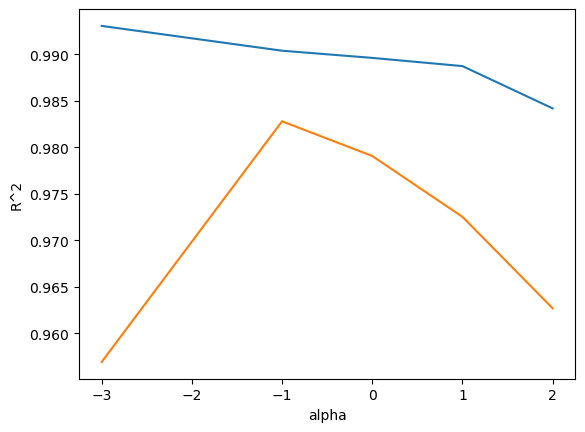

In [38]:
# 시각화
import matplotlib.pyplot as plt
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)

plt.xlabel("alpha")
plt.ylabel("R^2")
plt.show()

훈련세트와 테스트세트에 대한 점수 차이가 크다. 두 그래프의 차이가 가장 적은 alpha값이 최적이라고 볼 수 있다. 따라서 alpha = 0.1로 훈련시킬때 과대적합과 과소적합 사이의 균형을 이룰 수 있다.

In [39]:
ridge = Ridge(alpha = 0.1)
ridge.fit(trained_scaled, train_target)
print(ridge.score(trained_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386989


## 라쏘 회귀

선형회귀에서 L1규제를 추가한 회귀모델로 L1 규제란 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 예측시 0인 특성이 선택되지 않도록 하는 것

릿지와 유사하게  alpha값을 조절하며 최적을 찾아 과대적합과 과소적합을 적절하게 조절하는 값을 찾는 것이 좋다.

In [41]:
from sklearn.linear_model import Lasso

In [43]:
lasso = Lasso()

lasso.fit(trained_scaled, train_target)

print(lasso.score(trained_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421886


릿지와 마찬가지로 과대적합을 잘 억제하고 테스트 세트 성능도 높였다. 라쏘의 경우 계수값이 0이되는 경우가 있다.

In [45]:
print("55개의 특성 중 계수가 0이 된 특성의 개수는: ", np.sum(lasso.coef_ ==0))

55개의 특성 중 계수가 0이 된 특성의 개수는:  42
